# Probabilities, Expected Values, and Effective Altruism

Probabilities can be confusing, and the ways we talk about them in everyday life do not help with that confusion. If someone says you have a modest chance of something, what does that mean? This tweet caught my eye the other day:

In [2]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">1,700 people answered a survey that asked them to attach probabilities to 23 common words and phrases. The results are summarized in the figure. There’s a real possibility that it’s is the most interesting chart you’ll see this week. <a href="https://t.co/rwiwC4uqF2">https://t.co/rwiwC4uqF2</a> <a href="https://t.co/CsuFGFBN72">pic.twitter.com/CsuFGFBN72</a></p>&mdash; Arvind Narayanan (@random_walker) <a href="https://twitter.com/random_walker/status/1014487774064447488?ref_src=twsrc%5Etfw">July 4, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


This was interesting and nicely shows that "with low probability", "rarely", and even "unlikely" mean many differet things to many different people. As an example, Allen Downey suggests the next time someone says that they are 99% sure of something, offer to take a bet where they give you 99:1 odds. Obviosuly, they will likely take back their statement and say you are being far too literal. 

But qualitative interpretations of quantitative probabilites can lead to a lot of trouble. 
Allen Downey actually has a lot of [good thoughts](http://allendowney.blogspot.com/2016/11/why-are-we-so-surprised.html) on this and other misinterpretations of probability with regards to election results that are worth pondering in general. For example, everyone seemed surprised by a Trump win, who was given roughly a 30% chance by FiveThirtyEight. However, those same people would not have been shocked to see a coin come up heads twice in a row? Even if we take the Upshot's prediction of around 10% for Trump, should it really be that surprising?

Well unfortunately it is to many. The problem is that many interpret 70%-30% like a prediction of American football scores or a poll where 70% of the voters decided on one side. Clearly, work needs to be done on helping the general public better understand this. 

Another interesting problem Downey points out is the difficulty in comparing probabilites. He gives the example of two models that predict a win probability of 70% and 99%. If one were instead to take two measurements 70 units and 99 units, the weight would likely be reported as the average +/- the standard error, which is approximately 84.5 +/- 14.5 units.

However, this might indicate a chance that the true value could be greater than 100, which is clearly not true of probabilites. Furthermore, with probabilites, 84.5% is not really a good midpoint between 70% and 99%. Downey contends that we should be using **log-odds** to properly compare probabiliteis. The log-odds of a probability $p$ is $\log{\left(\frac{p}{1-p}\right)}$ and the graph is shown below.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

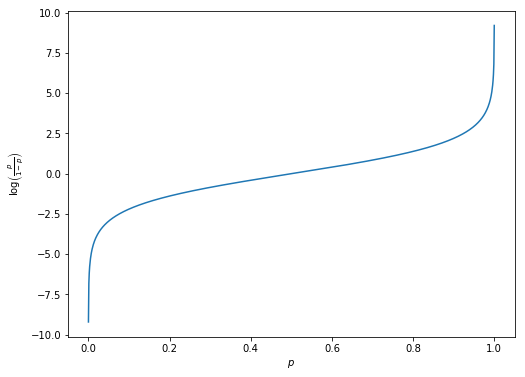

In [11]:
plt.figure(figsize=(8,6))

p = np.linspace(0.0001,.9999,1000)
plt.plot(p, np.log(p/(1-p)))
plt.xlabel(r'$p$')
plt.ylabel(r'$\log{\left(\frac{p}{1-p}\right)}$')

Using log-odds, Downey calculates that the "most meaningful midpoint" between 70% and 99% is 94%.

As for why one should use the log-odds to calculate differences in probability, Downey tweeted that "the distance between two points in log-odds space is proportional to the information it would take to get you from one point to the other, in the sense of a Bayesian update." And if you think about small probabilites, the distance in log-odds space is a much better metric. For example, the difference between $p_1=\frac{1}{1000}$ and $p_2=\frac{1}{10000}$ is $p_1 - p_2 = \frac{1}{1000} - \frac{1}{10000} = \frac{9}{10000}$. However, these probabilities are different by an order of magnitude and the distance in log-odds space is 1.0004, which is pretty close to the log-odds difference between 50% and 91%.

*Things to go into:* 

Should have thoughts here on Ord and Sandberg paper on methodological challenges, particularly how they use the law of total probability.

Need for uncertainties can be further demonstrated by their work on Fermi Paradox.

Also, go into Allen Downey's thoughts on single-case probabilities and need for log-odds

### Let's play a game ###

Here's the game. I am going to flip a coin, and I'll even flip a fair one for you. If the coin comes up heads, you win \$2 profit for every \$1 you bet (for a total of \$3). However, if the coin comes up tails, you lose everything. You start with $1, so what do you do?

Well the obvious answer is that you bet on heads. Let's look at the expected value of profit when betting $1 on heads.

Expected Profit for \$1 bet $ = 0.5*(2.0) + 0.5*(-1.0) = \$ 0.5$

That is an expected fifty cent (or 50%) profit per round; You should definitely play this game! Another way to say this is that since the coin lands on heads 50% of the time, I should be giving you even money, 1:1 odds, yet I am giving you 2:1 odds, so this is a clear betting oppurtunity. 

So you play the game and bet your whole dollar in the first round. The coin comes up tails. So much for averages! You have just experienced what is often called *Gambler's Ruin*...

This raises the question, should you really have bet that whole $1?

Let's do the same math as before for a bet of $x$ cents between \$0.0 and \$1.0.

Expected Profit for bet of size $x = 0.5*(2*x) + 0.5*(-x) = 0.5*x $

For the player, this is obviously maximized when $x$ is as large as possible. Therefore, the player would bet the whole $1 to maximize the expected projit and "risk ruin."

Some of you may be thinking that I am doing this wrong -- what I really should be optimizing is the expected amount of money in the bankroll after a bet, not just the expected profit. Well let's do it out and see:

Expected Bankroll after bet of size $x = 0.5*(1+2*x) + 0.5*(1-x) = 1 + 0.5*x $

This is again maximized when $x$ equals our whole bankroll and does not change our answer.

If you played this game for 10 rounds, and bet your whole bankroll each round to maximize your expected return, there is a $\left(\frac{1}{2}\right)^{10} = \frac{1}{1024}$ chance that you have won \$59,049 and a $\frac{1023}{1024}=99.9%$ you end up bankrupt.

This is obvioulsy not a very good way to make money on a game *where you have the potential to and should be making lots of it*!

### The Kelly Criterion ###

So what do you do? How do you bet the *optimal fraction* $f$ of your bankroll, in order to avoid ruin and still maximize profits for the long term. The answer is given by the **Kelly Critierion** and was actually originally derived from information theoretic principles.

Let's focus on the long term bankroll for a bit. Assume you have an initial bankroll $B_0$ and each game you have a probability $p$ of winning the bet, which will yield $\$b$ in profit.

With this info, let's try to find the optimum value of $f$, the fraction you should bet each round. 

Let's look at our bankroll after the first round $B_1$. There are two distinct possibilites:

You win, and your bankroll is increased by profit per dollar * dollars bet: $B_1 = B_0 + b*(fB_0) = (1+bf)B_0$

You lose, and your bankroll is reduced by the amount you bet: $B_1 = B_0 - fB_0 = (1-f)B_0$

Therefore, after each round, your bankroll is either multiplied by the factor $(1+bf)$ if you win or $(1-f)$ if you lost. It is not too hard to see then that after $n$ games with $w$ winning rounds, your bankroll will be as follows:

$B_n = (1+bf)^w (1-f)^{n-w} B_0 $

And the *Gain* after $n$ rounds is just equal to that multiplictive factor. I.e., $\text{Gain}_n = (1+bf)^w (1-f)^{n-w}$

The Kelly Criterion is then the $f$ that maximizes either the geometric mean of the gain of the arithmetic mean of the log of the gain. I refer you to these helpful [notes](https://pdfs.semanticscholar.org/presentation/3a8e/f144ca690f8c3530e9c1f587ab753e2922ce.pdf), which much of this is based on, for more intuition behind these statements.

### My Preferred Derivation ###

Our strategy is to bet a fixed fraction $f$ of our wealth on this favorable bet that we have found. Let us examine our average return in the long run. Note: the derivation here is not completely rigorous, but follows the approach given [here](http://www.elem.com/~btilly/kelly-criterion/).

After each round of betting, our initial net worth $B_0$ is multiplied by a random variable $X$. So after $n$ rounds of the betting, our net worth $B_n$ is just our initial wealth multiplied by the random outcomes of our $n$ bets:

$B_n = X_n \cdots X_2 X_1 B_0 $

Statistics is much easier with random variables that are added together rather than multiplied together. Therefore, let's do a log transformation.

$$
\begin{align*}
B_n &= B_0 \left( e^{\log{(X_1 X_2 \cdots X_n)}} \right) \\
&= B_0 \left( e^{\log{X_1} + \log{X_2} + \cdots + \log{X_n}} \right) 
\end{align*}
$$
   

Let us then take the expected value of each side and recognize that $E(\log{X_1} + log{X_2} + \cdots + log{X_n}) = n*E(\log{X})$ Thus, our average final wealth after $n$ bets is:

$E(B_n) = B_0 \left( e^{E(\log{X})} \right)^n $

Thus, it can be seen that the initial net worth is multiplied on average by a factor of $\left( e^{E(\log{X})} \right)$ after each round of betting.

In our example, the longterm rate of return is $e^{E(\log{X})} = e^{p\log(X_{win}) + (1-p)\log{(X_{loss})}} $

We see that for our original example, if we simply bet our whole bankroll each round. 

$E(B_n) = e^{({(0.5)\log{2} + (0.5)\log{0}})} = e^{-\infty} = 0$

Let's instead take the derivative to try to find the optimum value.

It is easy to see that to maximize 

$ e^{E(\log{X})} $ we must maximixe $ E(\log{X}) $ where $X_{win} = (1 + bf)$ an $X_{loss} = (1-f)$, which are exactly the factors we saw before with the previous approach. 

Thus, 

$ E(\log{X}) = p\log{(1+bf)} + (1-p)\log{(1-f)}$ 

and,

$ \frac{d E(\log{X})}{d f} = p\frac{b}{1+bf} + (1-p)\frac{-1}{1-f} \overset{\mathrm{set}}{=} 0$

By doing solving for the optimal $f$, we then get to the expression:

$ f = \frac{pb - (1-p)}{b}$ 

Often, people will call the expression in the numberator $pb - (1-p)$ the *edge*, while $b$ is commonly reffered to as the *odds*. Thus, we get the interpretation of the Kelly Criterion as *edge over odds*. 

#### Back to our original example ####

To find the optimal wager for our original game, we then simply plug our values into the above expression.

$ f = \frac{(0.5)(2) - (1-0.5)}{2} = \frac{0.5}{2} = 0.25 $.

Thus, we see that the optimal bet is to bet 25% of our bankroll each round. And we can see that our long term rate of return for each round will be.

$e^{E(log{X})} = e^{p\log(1+bf) + (1-p)\log{(1-f)}} = e^{(0.5)\log(1+(2)(0.25)) + (1-0.5)\log{(1-0.25)}} = 1.0607$ (a positive 6.07% return) 

Thus, after ten rounds our initial bankroll $B_0= \$1$ will grow to $E(B_n) = (1.0607)^{10} B_0 = 1.802 $. This is actually lower than the mean promised by the method of betting one's whole bankroll each round. However, the distribution of returns is much less skewed. By using this optimal $f$ from the Kelly Criterion, we are promised a few things:

* The Kelly Criterion maximizes the final wealth better than any other strategy

* The Kelly Crierion maximizes the median of the final wealth better than any other strategy

* The Kelly Criterion minimizes the amount of time  to reach a given final wealth

This is not to say the Kelly Criterion is flawless. Betting using the Kelly Criterion can still lead to volatile returns and can be dangerous if certain parameters of the equation are estimated incorrectly. For example, many people will use a *fractional Kelly* strategy, in which they only bet a certain fraction of the Kelly $f$ because they fear they may be overestimating their win probability. There are other useful extensions of Kelly such as when betting on *multiple outcomes*. This is particularly useful when attempting to allocate bets in the stock market, for example.

It's also worth looking back at what we have done to get here. We have essentially maximised the expected value of the *logarithm* of the wealth. This can be viewed as the *utility function* used in our example. Therefore, Kelly will maximize the expected utility of someone who has a logarithmic utility function. However, if the utility function is different, it will not. 

### Another Game: The St. Petersburg Lottery ###

On [overcomingbias](www.overcomingbias.com), Robin Hanson [wrote](http://www.overcomingbias.com/2011/07/ignoring-small-chances.html) about a very famous paradox known as the [St. Petersburg Paradox/Lottery](https://en.wikipedia.org/wiki/St._Petersburg_paradox). The paradox has received much attention over on [lesswrong](https://www.lesswrong.com/) because the problem gets right to the crux of many of the issues lesswrong members think about. 

The problem is as follows:

A fair coin is tossed and the game ends immedietely when the coin lands on tails. If tails appears on the first toss, the player wins \$2. If the first toss is instead heads, the game continues. If tails appears on the second toss, the payout is doubled and the player wins \$4. The game continues as such for as long as heads are tossed and the payout is doubled after each round. Since the probability of the game continuing also halves after each round, we run into some interesting behavior.

For example, let's calculate the expected winnings from playing such a game:

$$
\begin{align*}
E &= \frac{1}{2}*2 + \frac{1}{4}*4 + \frac{1}{8}*8 + \cdots \\
&= 1+1+1 + \cdots \\
&= \infty \\
\end{align*}
$$

The questiion then, is how much would/should one pay to play such a game. 

By using a pure expected value apprach, it seems that one should enter the game at any price -- even if it requires borrowing huge amounts of money to enter. Yet, many studies have been done to show that most people will definitely not do that. In his aforementioned blog post, Robin Hanson quotes the following paragraph from this interesting [paper](http://d.repec.org/n?u=RePEc:crf:wpaper:10-14&r=exp):

```
Nicholas Bernoulli … suggested that more than five tosses of heads are [seen as] morally impossible [and so ignored]. This proposition is experimentally tested through the elicitation of subjects‘ willingness-to-pay for various truncated versions of the Petersburg gamble that differ in the maximum payoff. … All gambles that involved probability levels smaller than 1/16 and maximum payoffs greater than 16 Euro elicited the same distribution of valuations. … The payoffs were as described …. but in Euros rather than in ducats. … The more senior students seemed to have a higher willingness-to-pay. … Offers increase significantly with income.
```

Clearly, people don't do great with small probabilites. For some context, let's look back at what some other famous mathematicions thought about small probabilites...

According to Richard Epstein in his book *The Theory of Gambling and Statistical Logic*, d'Alembert "promulgated the doctrine that a very small probability is practically equivalent to zero. However, he also believed that tossing three coins was different than three tosses of one coin, so perhaps he is not the greatest source on probabilitiy.

Buffon apparently established that 1/10,000 was the lowest practical probability while the logician Charles Sanders Peirce believed that everything that can happen will happen. One lesson is that the strageness of small probabilities led a lot of smart people to belive some very weird things.

As Robin Hanson also writes of the previously mentioned paper's results:

```
This isn’t plausibly explained by risk aversion, nor by a general neglect of possibilities with a <5% chance. I suspect this is more about analysis complexity, i.e., about limiting the number of possibilities we’ll consider at any one time. I also suspect this bodes ill for existential risk mitigation.
```

Now it's worth examining Daniel Bernoulli's eventual solution to the problem (yes, he provided the solution to his cousin's Nicholas Bernoulli's problem). Daniel proposed that one should not focus on the expected value, but rather the *expected utility*. By introducing a *utility function* with diminishing marginal utility of money, the expected utility can be finite while the expected value is still infinite. 

Bernoulli justified his reasoning and assumption of diminishing marginal utility as follows:

```
The determination of the value of an item must not be based on the price, but rather on the utility it yields…. There is no doubt that a gain of one thousand ducats is more significant to the pauper than to a rich man though both gain the same amount.
```

In particular, Daniel Bernoulli suggested the log-utility function $U(w)=\log{(w)}$, which is obviously a function of wealth and has diminishing marginal utility built into it, due to the concavity of the logarithmic function.

Using this model, Bernoulli was able to demonstrate how much a person of a given wealth should gamble on the theoretical St. Petersburg Lottery. For example, he came up with the following figures (numbers taken right from the [Wikipedia page](https://en.wikipedia.org/wiki/St._Petersburg_paradox)):

* Wealth = \$1,000,000: Should pay up to \$20.28 to play
* Wealth = \$1,000: Should pay up to \$10.95 to play
* Wealth = \$2: Should pay up to \$3.35 (by borrowing money) to play

### An Interesting Connection ###

The astute reader may notice that much of this analysis, including the log-utility function, looks quite similar to that which we performed when deriving the Kelly Criterion. This is no coincidece, Daniel Bernoulli's results exactly equal those one would get by using the Kelly Criterion (he approached it by maximizing the geometric mean of the outcomes).

Other readers may wonder what exactly makes the logarithmic function special. Well, for one, it makes for easier analysis. However, Owen Cotton-Barratt of the Future of Humanity institue at Oxford has provided [some theory](http://globalprioritiesproject.org/2015/02/part-5-theory-behind-logarithmic-returns/) behind mechanisms that might bring about logarithmic returns on investment. Cotton-Barratt also provides [some empirical evidence](http://globalprioritiesproject.org/2015/02/the-law-of-logarithmic-returns/) for the logarithmic form. If you are interested more in this topic, I highly suggest the [entire series of posts](http://globalprioritiesproject.org/2015/02/project-overview-problems-of-unknown-difficulty/) put together by Cotton-Barratt on the cost-effectiveness of problems of unknown difficulty. 

One other thing to note about log-utility is that it has [*risk-aversion*](https://en.wikipedia.org/wiki/Expected_utility_hypothesis#Risk_aversion) built directly into the functional form. Since $\frac{d U}{d w} = \frac{1}{w} > 0$ and $\frac{d^2 U}{d w^2} = \frac{-1}{w^2} < 0$, the function's curvature implies risk aversion (more to lose than to gain from taking a big risk). This also implies that if there are bets of equal expected value, one would always take the the bet with a lower variance of return. 

In contrast, a linear utility function would imply risk-neutrality, while a convex utility function would imply risk loving tendencies. Interestingly, there are those who argue that diminishing returns does not apply as a concept to charities (see [this post](https://concepts.effectivealtruism.org/concepts/diminishing-returns/)). For example, Michael Dickens [argues](http://effective-altruism.com/ea/wr/how_should_a_large_donor_prioritize_cause_areas/#fundamental-risk-aversion) that diminishing returns don't apply for work on existential risks, and he has praised Open Phil's philosophy of [risk agnostic giving](https://www.openphilanthropy.org/blog/hits-based-giving). (NOTE TO SELF: I actually don't fully understand his argument and should work to further understand his reasoning.)

Additionally, Brian Tomasik has [written](The Case for Risky Investments) that charitible utility functions are approximately linear and risk-aversion shouldn't apply. However, he seemed to walk back that view calling it "overly simplistic" and has written a newer article entitled ["When Should Altruists Be Financially Risk-Averse?"](http://reducing-suffering.org/when-should-altruists-be-financially-risk-averse/) Interestingly, Tomasik and Dickens have both [encouraged](http://reducing-suffering.org/why-maximize-expected-value/) giving based solely in terms of expected value. 

Tomasik's arguments, in particular, are quite interesting -- even appealing to certain interpretations of quantum mechanics. However, one of his simpler and more compelling arguments for expected value giving is one of "rule utilitarianism." Essentially, he is saying that if everyone makes decisions based on expected value this will imply the best possible consequences by the law of large numbers. Furthermore, "we should praise people based on doing what seemed at the time to be the action of highest expected value, even if the person got unlucky with the actual outcome." However, I am not sure this is totally correct. To adapt an example from Holden Karnofsky's [2011 post on expected value estimates](https://blog.givewell.org/2011/08/18/why-we-cant-take-expected-value-estimates-literally-even-when-theyre-unbiased/), if a man is standing by a lake in his \$5,000 custom suit and sees a kid drowning, should he simply let the kid drown because he realizes he could sell the suit and donate \5,000 to save an estimated 1.5 lives? Should he be praised for this expected value decision? Perhaps he should be scolded for even spending so much on a suit and not using that money for chartiy? But maybe he needed the suit to fit in and get a job with a large income that has allowed him to donate more to charity than he ever would have been able to otherwise? I don't know, but it doesn't seem so clear to me. 

Let's not lose sight of the forest here. We have shown examples of situations where betting using an expected-value approach is clearly not ideal. For those of you familiar with [lesswrong](https://www.lesswrong.com/) discussions, the St. Petersburg Paradox may even remind you of [Pascal's Mugging](https://nickbostrom.com/papers/pascal.pdf) (this illustrative explanation by Nick Bostrom is even quite funny). However, there is debate regarding risk-aversion and charitible giving, as well as what a utility function should even look like for giving. And we also, know from earlier discussions that dealing with small probabilites is extremely tough. However, to many, the idea that one should use a pure expected value approach and should not consider risk-aversion when giving to existential risks is tough to swallow. I am one of those people.

### My Current Concerns About an Expected Value Approach ###

I admit that I may totally be wrong, and I am happy to be convinced otherwise. My effective altruist friend who convinced me to become vegetarian after living on a farm my whole life can back that up. So let me put forward some of my current concerns and perhaps you can see what evidence it will take to change my mind.

** Pascal's Mugging and Gambbler's Ruin **

There's one thing I never understood about ...

Buckley Program at Yale ... ///

Expand upon Terrence Tao comment on quomodumque ...






